
**<h1 style="color:yellow" align="center">Heart Disease</h1>**

Heart disease covers a range of different conditions that could affect your heart. 


It is one of the most complex diseases to predict given the number of potential factors in the body that can lead to it.


**Download**


the dataset from here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


There are 303 records in the dataset and it contains 14 continuous attributes.


**Goal**


The goal is to predict the presence of heart disease in the patient.


The dataset contained an original set of 76 attributes which has been narrowed down to total of 14 as follows: 



• age: The person’s age in years
• sex: The person’s sex (1 = male, 0 = female)
• cp: The chest pain experienced (value 1: typical angina, value 2: atypical angina, value 3: non-anginal
• pain, value 4: asymptomatic)
• trestbps: The person’s resting blood pressure
• chol: The person’s cholesterol measurement in mg/dl
• fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
• restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2= showing probable or definite left ventricular hypertrophy by Estes’ criteria)
• thalach: The person’s maximum heart rate achieved
• exang: Exercise induced angina (1 = yes; 0 = no)
• oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)
• slope: The slope of the peak exercise ST segment (value 1: upsloping, value 2: flat, value 3:
• downsloping)
• ca: The number of major vessels (0 – 3)
• thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
• target: Heart disease (0 = no, 1 = yes)


In [30]:
import pandas as pd
import seaborn as sns

from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

# from keras.utils import to_categorical  ---> Sometime makes ERRORS
import tensorflow as tf
from tensorflow.keras.models import load_model     # loading the model

import matplotlib.pyplot as plt
import numpy as np

# for confusion matrix (old way)
import itertools
from sklearn.metrics import confusion_matrix

# for confusin matrix (new way)
from sklearn.metrics import plot_confusion_matrix

In [31]:
df = pd.read_csv("heart.csv")
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


**<h2 style="color:cyan">Data Visualization</h2>**

Plot the distribution between heart disease and the absence of it, indicated by the target
attribute


Text(0.5, 0, '')

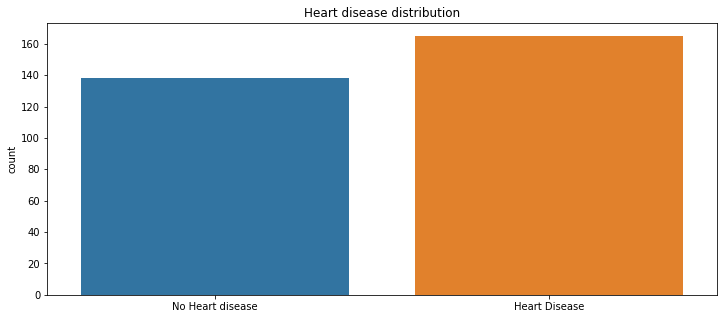

In [32]:
plt.figure(figsize=(12,5))
f = sns.countplot(x='target', data=df)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Plot the distribution for male and female gender (skew). The distribution of “no heart disease” between males and females is skewed.


Text(0.5, 0, '')

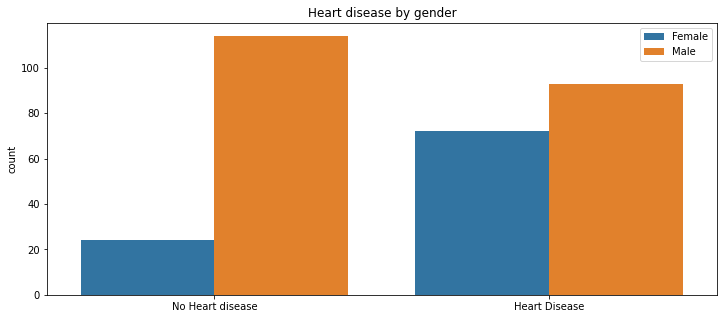

In [33]:
plt.figure(figsize=(12,5))
f = sns.countplot(x='target', data=df, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("")

Plot a correlation map.
There is no strong correlation between any of the 14 attributes.

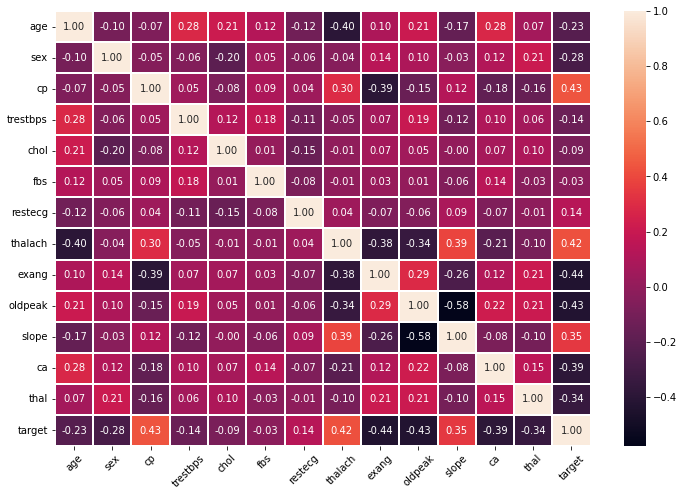

In [34]:
plt.figure(figsize=(12,8))
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True,
fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (50,50)

**<h2 style="color:cyan">Defining X (input) and y (target)</h2>**

In [35]:
X = df.drop(['target'], axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [36]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [37]:
y.shape

(303,)

In [58]:
X = X.to_numpy()

In [59]:
y = y.to_numpy()

Converion to a NumPy array (better for NN)

In [38]:
X.to_numpy()

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [39]:
y.to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [62]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**<h2 style="color:cyan">Splitting the data</h2>**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [65]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [41]:
y_test.shape

(61,)

In [42]:
print("Xtrain shape: ", X_train.shape)
print("ytrain shape: ", y_train.shape)
print("Xtest shape: ", X_test.shape)
print("ytest shape: ", y_test.shape)

Xtrain shape:  (242, 13)
ytrain shape:  (242,)
Xtest shape:  (61, 13)
ytest shape:  (61,)


**<h2 style="color:cyan">Parameters</h2>**


In [43]:
epoch = 300
activ = ["sigmoid", "relu", "softmax"]

# Hidden layers
layer_1 = 15 # Number of Neurons
layer_2 = 10

**<h2 style="color:cyan">Build the Network</h2>**


In [44]:
network = models.Sequential()  # linear stack of layers

network.add(layers.Dense(layer_1, activation=activ[1], input_shape = (13,))) # (13,) vector 
network.add(layers.Dense(layer_2, activation=activ[0])) # the info about input_shape is taken from the layer above

# Output Layer
network.add(layers.Dense(1, activation=activ[0]))

In [45]:
network.summary()  # Parameters: weight + bias

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 15)                210       
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


**<h2 style="color:cyan" align="left">Complie / Configure the network</h2>**

- Optimizer: Mechasim to update the weights and biases
- Loss: (like error) How my model performs > MSE, MAE, etc.
- Metrics: Performance of my model > accuracy 

Accuracy --> between bad 0 and good 1. Pay attention to the numbers.

In [46]:
network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**<h2 style="color:cyan" align="left">Fit the network</h2>**

In [47]:
history = network.fit(X_train, y_train, epochs=epoch, shuffle=True, verbose=1, validation_split= 0.1)

Epoch 1/300
7/7 [==============================] - 2s 51ms/step - loss: 0.7018 - accuracy: 0.4470 - val_loss: 0.6997 - val_accuracy: 0.5200
Epoch 2/300
7/7 [==============================] - 0s 79ms/step - loss: 0.6934 - accuracy: 0.5622 - val_loss: 0.7023 - val_accuracy: 0.5200
Epoch 3/300
7/7 [==============================] - 0s 11ms/step - loss: 0.6912 - accuracy: 0.5806 - val_loss: 0.6982 - val_accuracy: 0.4800
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6875 - accuracy: 0.5622 - val_loss: 0.6982 - val_accuracy: 0.5200
Epoch 5/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6859 - accuracy: 0.5760 - val_loss: 0.6969 - val_accuracy: 0.4800
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 0.6834 - accuracy: 0.5760 - val_loss: 0.6971 - val_accuracy: 0.5200
Epoch 7/300
7/7 [==============================] - 0s 10ms/step - loss: 0.6819 - accuracy: 0.5991 - val_loss: 0.6963 - val_accuracy: 0.5200
Epoch 8/300
7/7 [====

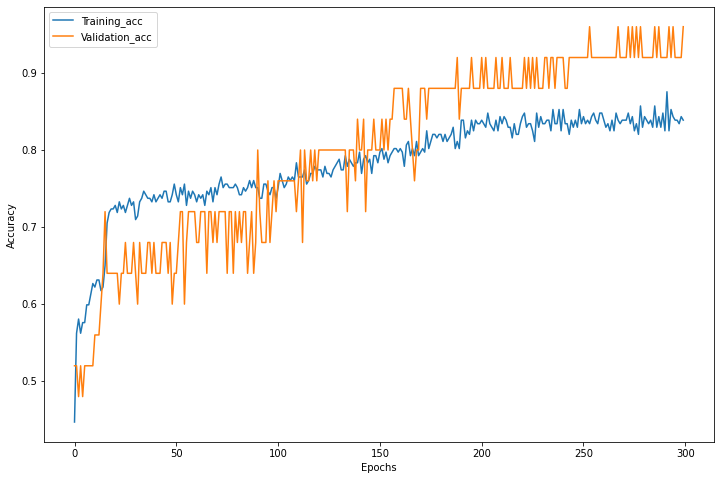

In [48]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Validation_acc"])
plt.show()

In [49]:
# Test score for test data using evaluation
test1_score, test2_score = network.evaluate(X_test, y_test)

print('Test Loss:', test1_score)
print('Test Accuracy: ', test2_score)

2/2 [==============================] - 0s 16ms/step - loss: 0.3987 - accuracy: 0.8525
Test Loss: 0.39871346950531006
Test Accuracy:  0.8524590134620667


In [50]:
prediction = network.predict(x = X_test)


In [68]:
# Just an overview of the predicted y data for y_test (20%)
for i in prediction:
    print("prediction for y_test", i)

prediction for y_test [0.09434921]
prediction for y_test [0.87224346]
prediction for y_test [0.94816935]
prediction for y_test [0.79612315]
prediction for y_test [0.82030606]
prediction for y_test [0.46299797]
prediction for y_test [0.7330787]
prediction for y_test [0.71023643]
prediction for y_test [0.5858223]
prediction for y_test [0.23745945]
prediction for y_test [0.77512556]
prediction for y_test [0.55208695]
prediction for y_test [0.11301109]
prediction for y_test [0.62318015]
prediction for y_test [0.67053646]
prediction for y_test [0.7790921]
prediction for y_test [0.11716509]
prediction for y_test [0.906592]
prediction for y_test [0.09225443]
prediction for y_test [0.56599855]
prediction for y_test [0.9421221]
prediction for y_test [0.60269296]
prediction for y_test [0.9482901]
prediction for y_test [0.74446976]
prediction for y_test [0.7503911]
prediction for y_test [0.6515626]
prediction for y_test [0.91495323]
prediction for y_test [0.79236555]
prediction for y_test [0.8488

In [52]:
rounded_prediction = np.round(prediction)

In [73]:
rounded_prediction

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [77]:
# Displays the prediction: [0.] --> actual label, target, outut ; 0  --> prediction
for i in range(10):
    print(f" real y_test: {rounded_prediction[i]}---> Predicted: {y_test[i]} ")

 real y_test: [0.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 1 
 real y_test: [1.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 1 
 real y_test: [0.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 0 
 real y_test: [1.]---> Predicted: 1 
 real y_test: [0.]---> Predicted: 1 


In [70]:
rounded_prediction.shape

(61, 1)

In [71]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [72]:
y_test.shape

(61,)

**<h2 style="color:cyan">Confusion Matrix</h2>**


In [83]:
# 1. Variant
# Code is copied from Scikit website

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7 21]
 [ 9 24]]


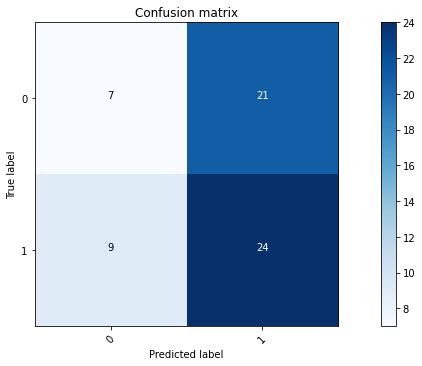

In [84]:
plt.figure(figsize=(12,5))
cm = confusion_matrix(y_true=y_test, y_pred=rounded_prediction)

# Create labels for my plot --> Classes
cm_plot_labels = ["0", "1"]

plot_confusion_matrix(cm= cm, classes= cm_plot_labels, title= "Confusion matrix")

**<h2 style="color:green" align="left">Save the Model</h2>**

1. save the whole model(network) : architecture, weights and biases, configuration